# train 데이터 확인 및 결측치 평균으로 처리

In [37]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/dasolyoo/Documents/workspace/tutorial/python/fake-listing-predict/data/train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


# 파생변수 생성 
### 미기재

In [38]:
df['미기재'] = df.isna().sum(axis=1)
df.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,미기재
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,2
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0,2
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0,2
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1,2


### 방치일수

In [39]:
import datetime

# train = df.dropna(axis=0)
train = df
train.head()

last = datetime.datetime.strptime(train['게재일'].max(), "%Y-%m-%d").date()
today = last + datetime.timedelta(days=1)

def set_delta_days(date):
    delta = today - datetime.datetime.strptime(date, "%Y-%m-%d").date()
    return delta.days

train["방치일수"] = train["게재일"].apply(lambda x : set_delta_days(x))
    
train.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,미기재,방치일수
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,2,146
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0,2,68
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0,2,96
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0,0,98
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1,2,252


In [40]:
train['집세'] = (train['관리비'] * 10000 + train['월세'])
train.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,미기재,방치일수,집세
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,2,146,1430000
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0,2,68,200000
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0,2,96,380000
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0,0,98,130000
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1,2,252,530000


# 아이디 중복 확인
* Length: 2452 -> ID 중복 없음
* 초기 게재일, 업데이트일 등 분석 불가능

In [41]:
train['ID'].value_counts()

ID
TRAIN_0000    1
TRAIN_1638    1
TRAIN_1631    1
TRAIN_1632    1
TRAIN_1633    1
             ..
TRAIN_0817    1
TRAIN_0818    1
TRAIN_0819    1
TRAIN_0820    1
TRAIN_2451    1
Name: count, Length: 2452, dtype: int64

# 히스토그램

<Axes: xlabel='집세', ylabel='Count'>

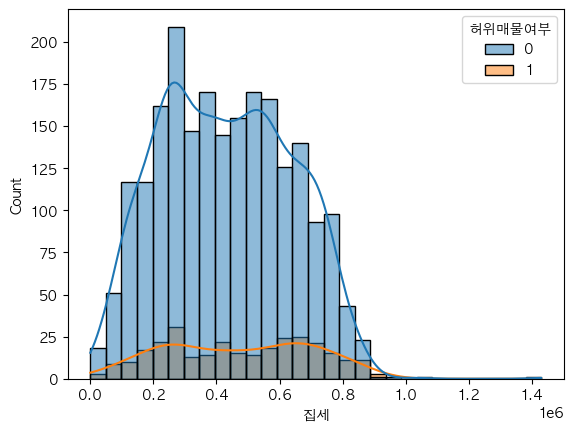

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')

sns.histplot(data=train, x='집세', hue='허위매물여부', kde=True, multiple='layer')

# 이상치 제거 함수

In [43]:
def detect_outliers(df, columns):
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3 - q1
    
    boundary = 1.5 * iqr
    
    index1 = df[df[columns] > q3 + boundary].index
    index2 = df[df[columns] < q1 - boundary].index 
    
    df[columns] = df[columns].drop(index1)
    df[columns] = df[columns].drop(index2)
    
    return df

# 보증금

<Axes: xlabel='보증금', ylabel='Count'>

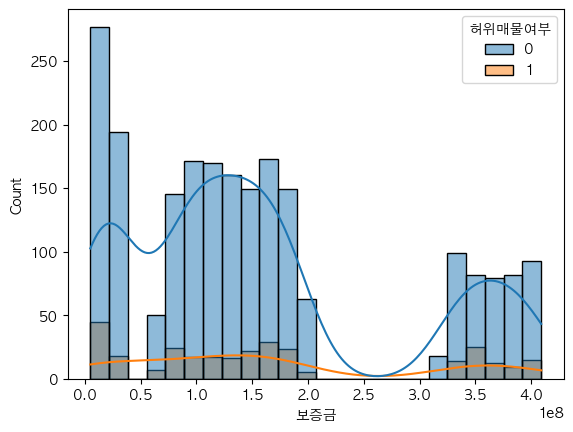

In [44]:
sns.histplot(data=train, x='보증금', hue='허위매물여부', kde=True, multiple='layer')

### 세 그룹으로 나눠서 다시 본 결과   
-> 특별한 인사이트 없어보임

<Axes: xlabel='보증금', ylabel='Count'>

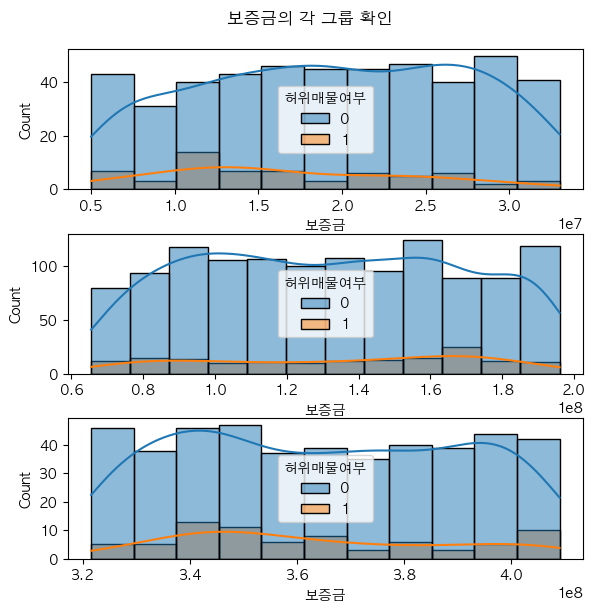

In [73]:
group1 = train[train["보증금"] < 50000000]
group2 = train[(50000000 < train["보증금"]) & (train["보증금"] < 250000000)]
group3 = train[250000000 < train["보증금"]]
fig, ax = plt.subplots(nrows=3, figsize=(6, 6))
fig.suptitle('보증금의 각 그룹 확인')
plt.tight_layout()

sns.histplot(data=group1, x='보증금', hue='허위매물여부', kde=True, multiple='layer' , ax=ax[0])
sns.histplot(data=group2, x='보증금', hue='허위매물여부', kde=True, multiple='layer' , ax=ax[1])
sns.histplot(data=group3, x='보증금', hue='허위매물여부', kde=True, multiple='layer' , ax=ax[2])

# 월세

<Axes: xlabel='월세', ylabel='Count'>

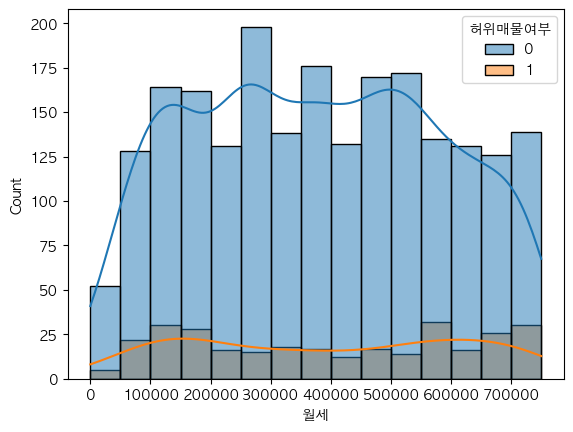

In [46]:
sns.histplot(data=train, x='월세', hue='허위매물여부', kde=True, multiple='layer')

# 관리비

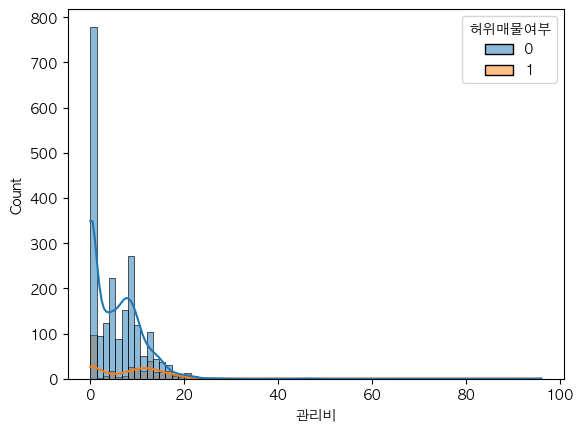

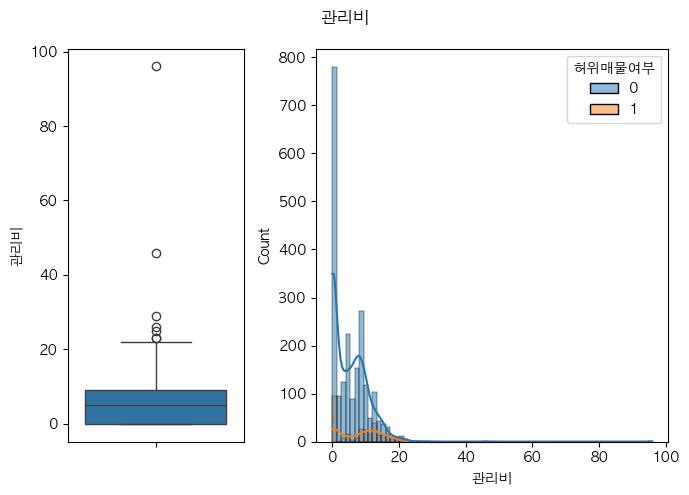

In [64]:
sns.histplot(data=train, x='관리비', hue='허위매물여부', kde=True, multiple='layer')

fig, ax = plt.subplots(ncols=2, figsize=(7, 5), gridspec_kw={'width_ratios': [1, 2]}) 
fig.suptitle('관리비')

sns.boxplot(y='관리비', data=train, ax=ax[0])
# detect_outliers(train, '관리비')
# sns.boxplot(y='관리비', data=train, ax=ax[1])
# plt.subplots_adjust(wspace=0.4)
sns.histplot(data=train, x='관리비', hue='허위매물여부', kde=True, multiple='layer')
plt.tight_layout()

### 관리비 0인 경우 제외하고 다시 그림

<Axes: xlabel='관리비', ylabel='Count'>

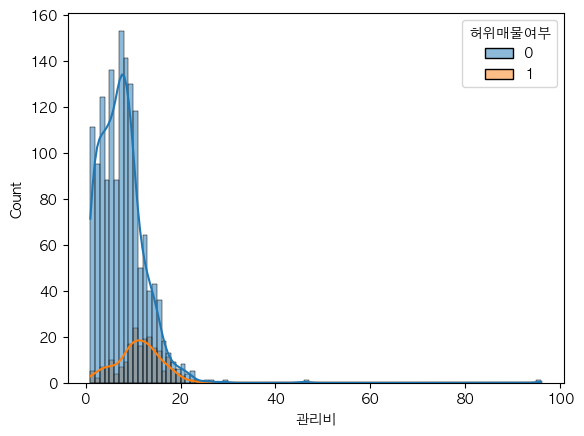

In [48]:
test = train[train['관리비'] != 0]
sns.histplot(data=test, x='관리비', hue='허위매물여부', kde=True, multiple='layer')

# 전용면적

<Axes: xlabel='전용면적', ylabel='Count'>

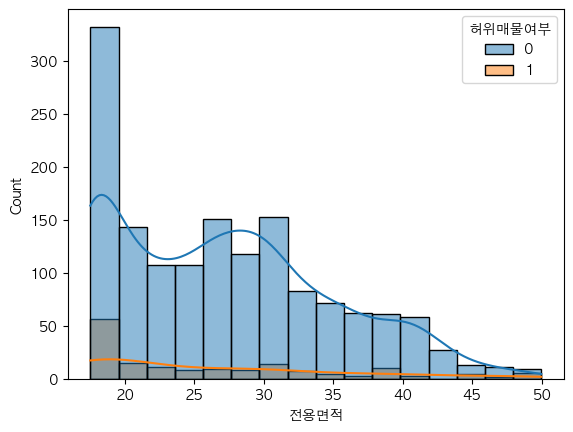

In [49]:
sns.histplot(data=train, x='전용면적', hue='허위매물여부', kde=True, multiple='layer')

# 연속형 변수들 간의 상관관계
이게뭐람..;;

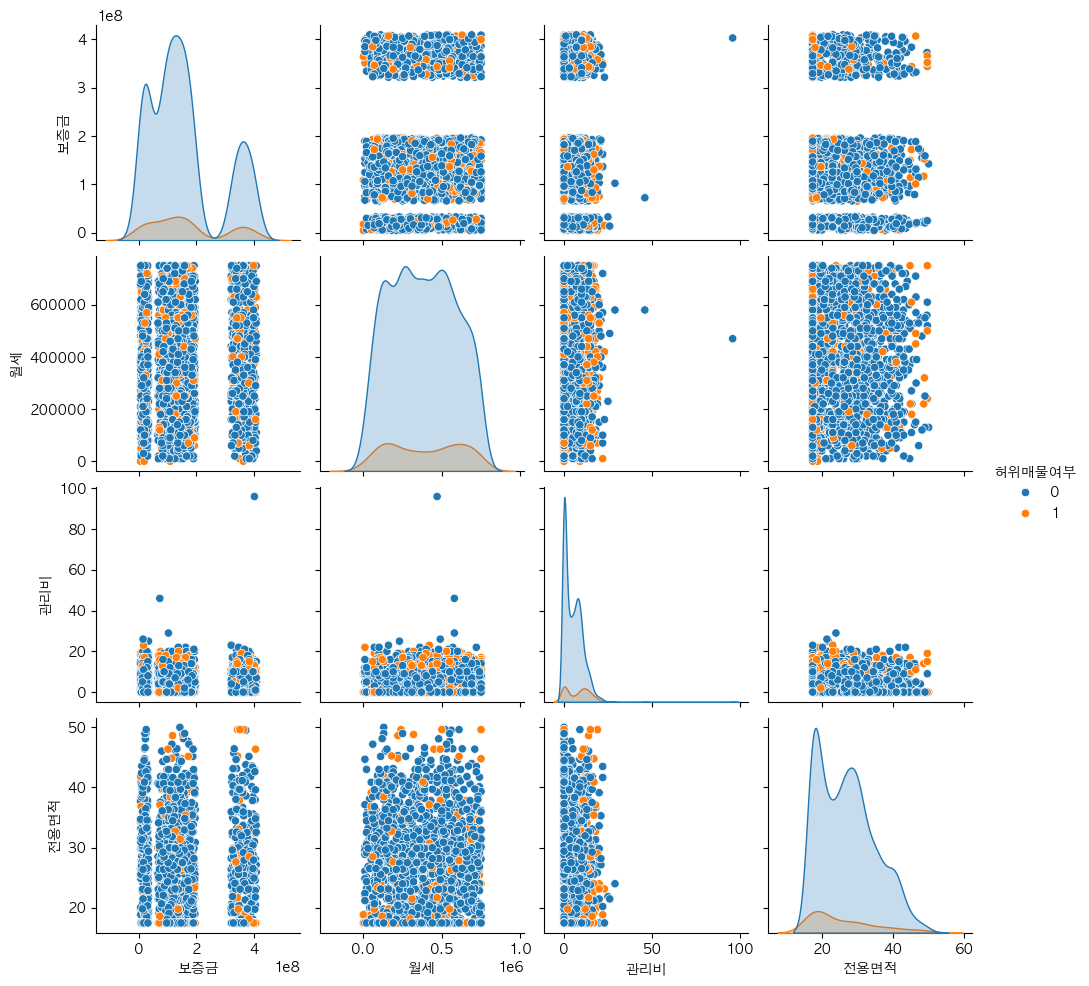

In [50]:
test = train[["보증금", "월세", "관리비", "전용면적", "허위매물여부"]]
sns.pairplot(test, hue="허위매물여부")

# 해당층, 총층
* 둘의 허위매물 분포 비슷 -> 상관 분석 
* 해당층과 총층은 연속형 -> 피어슨 상관분석

<Axes: xlabel='총층', ylabel='Count'>

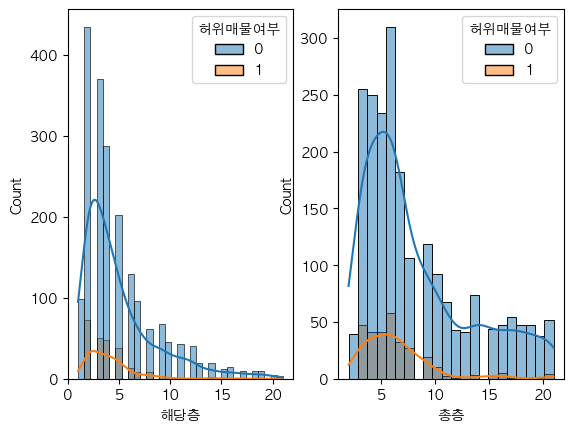

In [51]:
fig, ax = plt.subplots(ncols=2)
sns.histplot(data=train, x='해당층', hue='허위매물여부', kde=True, multiple='layer', ax=ax[0])
sns.histplot(data=train, x='총층', hue='허위매물여부', kde=True, multiple='layer', ax=ax[1])

### 피어슨 상관분석
* 0.632 -> 해당층과 총층의 관계가 어느정도 있음..

In [52]:
pearsonCoef = train[['해당층', '총층']].corr(method='pearson')
print(pearsonCoef)

          해당층        총층
해당층  1.000000  0.700091
총층   0.700091  1.000000


# 욕실수, 방수

In [53]:
pd.crosstab(index=[train['방수'], train['욕실수']], columns=train['허위매물여부'], margins=True)

허위매물여부      0    1   All
방수  욕실수                 
1.0 1.0  1344  170  1514
2.0 1.0   715  121   836
    2.0    81    3    84
All      2140  294  2434

# 총주차대수

<Axes: xlabel='총주차대수', ylabel='Count'>

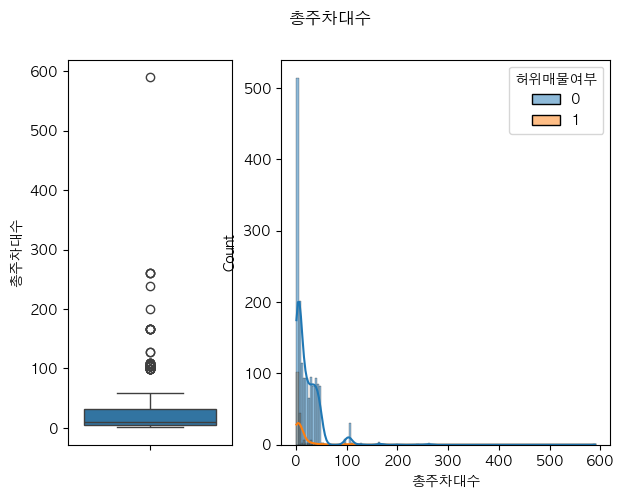

In [65]:
fig, ax = plt.subplots(ncols=2, figsize=(7, 5), gridspec_kw={'width_ratios': [1, 2]}) 
fig.suptitle('총주차대수')

sns.boxplot(y='총주차대수', data=train, ax=ax[0])
# detect_outliers(train, '총주차대수')
# sns.boxplot(y='총주차대수', data=train, ax=ax[1])
# sns.histplot(data=train, x='총주차대수', hue='허위매물여부', kde=True, multiple='layer', ax=ax[2])
sns.histplot(data=train, x='총주차대수', hue='허위매물여부', kde=True, multiple='layer')
# sns.histplot(data=train, x='총주차대수', hue='허위매물여부', kde=True, multiple='layer')

* 총주차대수 < 12 구간에 허위매물 있음
* 해당 구간만 다시 히스토그램  
-> 특별한 인사이트 안 보임

<Axes: xlabel='총주차대수', ylabel='Count'>

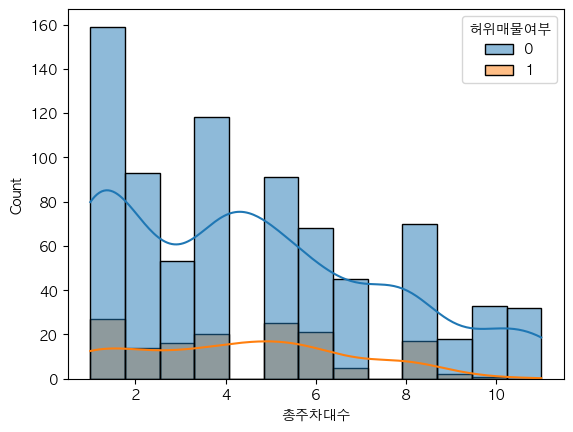

In [55]:
group1 = train[train["총주차대수"] < 12]

sns.histplot(data=group1, x='총주차대수', hue='허위매물여부', kde=True, multiple='layer')

# 주차가능여부

# 중개사무소

In [56]:
train['중개사무소'].value_counts()

중개사무소
G52Iz8V2B9    799
r82ax9M3U3     43
J52gJ2E4T6     32
H90uE4C0W5     30
b87Td0W4Y3     27
             ... 
m75Dz8P6I7      1
A21Yr4B1U8      1
g11ci7P5V1      1
D26uW0Q2N3      1
L27JO3N6S2      1
Name: count, Length: 279, dtype: int64

### 중개사무소 x 제공플랫폼 

* 중개사무소 'G52Iz8V2B9'가 799개로 젤 많은데 허위매물은 하나도 없음

In [57]:
filtered_by_office = train[train['중개사무소'] == 'G52Iz8V2B9']['허위매물여부'].value_counts()
filtered_by_office

허위매물여부
0    799
Name: count, dtype: int64

In [58]:
filtered_by_office = train[train['중개사무소'] == 'G52Iz8V2B9']
pd.crosstab(filtered_by_office['허위매물여부'], filtered_by_office['제공플랫폼'], margins=True)

제공플랫폼,A플랫폼,B플랫폼,C플랫폼,D플랫폼,E플랫폼,F플랫폼,G플랫폼,H플랫폼,I플랫폼,J플랫폼,K플랫폼,L플랫폼,All
허위매물여부,,,,,,,,,,,,,
0,314,209,114,50,46,26,13,9,9,3,2,4,799
All,314,209,114,50,46,26,13,9,9,3,2,4,799


In [59]:
pd.crosstab(index=[train['중개사무소'], train['제공플랫폼']], columns=train['허위매물여부'], margins=True)

,허위매물여부,0,1,All
중개사무소,제공플랫폼,,,
A06Nz2Z1R1,D플랫폼,1,0,1
A18IU3D9M4,B플랫폼,6,1,7
A21Yr4B1U8,B플랫폼,1,0,1
A24sf9I9O0,E플랫폼,3,0,3
A40fe5W3A7,D플랫폼,0,1,1
...,...,...,...,...
z40LO7P9C9,F플랫폼,22,3,25
z54Fl0B2P9,A플랫폼,15,8,23
z78FX7A1I1,H플랫폼,1,0,1


# 매물확인방식

In [60]:
pd.crosstab(train['매물확인방식'], train['허위매물여부'], margins=True)

허위매물여부,0,1,All
매물확인방식,,,
서류확인,327,38,365
전화확인,346,36,382
현장확인,1481,224,1705
All,2154,298,2452


# 방치일수
* 허위매물이 아닌 경우와 허위매물인 경우 그래프 구간 흐름?이 다름

<Axes: xlabel='방치일수', ylabel='Count'>

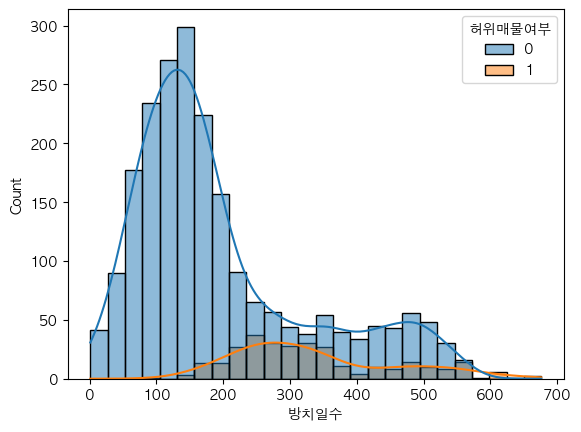

In [61]:
sns.histplot(data=train, x='방치일수', hue='허위매물여부', kde=True, multiple='layer')

* 방치일수 x 제공플랫폼
* 방치일수 x 중개사무소

# 미기재

허위매물여부,0,1,All
미기재,,,
0,1191,83,1274
1,553,125,678
2,379,81,460
3,19,5,24
5,4,0,4
6,8,4,12
All,2154,298,2452


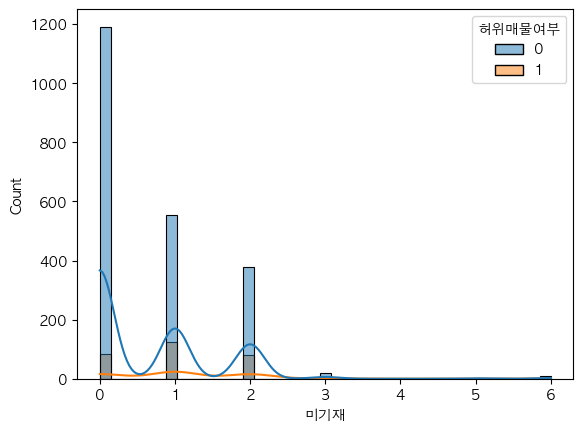

In [62]:
# train.head()
sns.histplot(data=train, x='미기재', hue='허위매물여부', kde=True, multiple='layer')
pd.crosstab(train['미기재'], train['허위매물여부'], margins=True)

<Axes: xlabel='집세', ylabel='Count'>

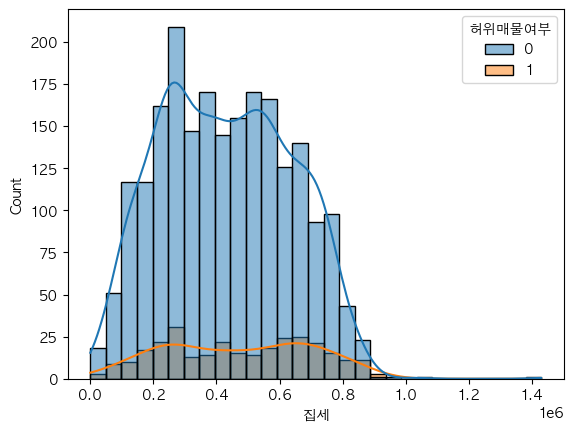

In [63]:
sns.histplot(data=train, x='집세', hue='허위매물여부', kde=True, multiple='layer')